In [1]:
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display, Image

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
WorkingDir = "D:\\TUANTA\\VTC Academiy\\AI VTCA Teaching Materials\\Short-Course AI\\4. AI Specialist(AI Engineer)"
WorkingDir += "\\2. Labs\\AI Specialist Support 02A"

os.chdir(WorkingDir)
checkPath = %pwd
print(checkPath)

D:\TUANTA\VTC Academiy\AI VTCA Teaching Materials\Short-Course AI\4. AI Specialist(AI Engineer)\2. Labs\AI Specialist Support 02A


In [5]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['text.color'] = 'k'

# SARIMA

SARIMA(p,d,q)(P,D,Q,s), Seasonal Autoregression Moving Average model:

AR(p)
  - autoregression model i.e. regression of the time series onto itself. The basic assumption is that the current series values depend on its previous values with some lag (or several lags). The maximum lag in the model is referred to as  p
 . To determine the initial  p
 , you need to look at the PACF plot and find the biggest significant lag after which most other lags become insignificant.
 
MA(q)
  - moving average model. Without going into too much detail, this models the error of the time series, again with the assumption that the current error depends on the previous with some lag, which is referred to as  q
 . The initial value can be found on the ACF plot with the same logic as before.
Let's combine our first 4 letters:

$AR(p)+MA(q)=ARMA(p,q)$
 

What we have here is the Autoregressive–moving-average model! If the series is stationary, it can be approximated with these 4 letters. Let's continue.

I(d)
  - order of integration. This is simply the number of nonseasonal differences needed to make the series stationary. In our case, it's just 1 because we used first differences.
Adding this letter to the four gives us the  ARIMA
  model which can handle non-stationary data with the help of nonseasonal differences. Great, one more letter to go!

S(s)
  - this is responsible for seasonality and equals the season period length of the series
With this, we have three parameters:  (P,D,Q)
 

P
  - order of autoregression for the seasonal component of the model, which can be derived from PACF. But you need to look at the number of significant lags, which are the multiples of the season period length. For example, if the period equals 24 and we see the 24-th and 48-th lags are significant in the PACF, that means the initial  P
 should be 2.

Q
  - similar logic using the ACF plot instead.

D
  - order of seasonal integration. This can be equal to 1 or 0, depending on whether seasonal differeces were applied or not.

In [17]:
stock = pd.read_csv('Apple.csv')

display(stock.head())
print(stock.shape)

,Date,High,Low,Open,Close,Volume,Adj Close
0,2000-01-03,4.017857,3.631696,3.745536,3.997768,133949200.0,2.665724
1,2000-01-04,3.950893,3.613839,3.866071,3.660714,128094400.0,2.440975
2,2000-01-05,3.948661,3.678571,3.705357,3.714286,194580400.0,2.476697
3,2000-01-06,3.821429,3.392857,3.790179,3.392857,191993200.0,2.262367
4,2000-01-07,3.607143,3.410714,3.446429,3.553571,115183600.0,2.369532


(4811, 7)


In [9]:
(stock['Date'].min(), stock['Date'].max())

('2000-01-03', '2019-02-15')

In [10]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4811 non-null   object 
 1   High       4811 non-null   float64
 2   Low        4811 non-null   float64
 3   Open       4811 non-null   float64
 4   Close      4811 non-null   float64
 5   Volume     4811 non-null   float64
 6   Adj Close  4811 non-null   float64
dtypes: float64(6), object(1)
memory usage: 263.2+ KB


In [18]:
stock.Date = pd.to_datetime(stock.Date, format='%Y-%m-%d', errors='ignore')
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4811 entries, 0 to 4810
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4811 non-null   datetime64[ns]
 1   High       4811 non-null   float64       
 2   Low        4811 non-null   float64       
 3   Open       4811 non-null   float64       
 4   Close      4811 non-null   float64       
 5   Volume     4811 non-null   float64       
 6   Adj Close  4811 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 263.2 KB


In [19]:
# Data preprocessing
cols = ['High', 'Low', 'Open', 'Volume', 'Adj Close']
stock.drop(cols, axis=1, inplace=True)
stock = stock.sort_values('Date')
display(stock.head())
print(stock.shape)

,Date,Close
0,2000-01-03,3.997768
1,2000-01-04,3.660714
2,2000-01-05,3.714286
3,2000-01-06,3.392857
4,2000-01-07,3.553571


(4811, 2)


In [20]:
stock = stock.groupby('Date')['Close'].sum().reset_index()
display(stock.head())
print(stock.shape)

,Date,Close
0,2000-01-03,3.997768
1,2000-01-04,3.660714
2,2000-01-05,3.714286
3,2000-01-06,3.392857
4,2000-01-07,3.553571


(4811, 2)


In [21]:
stock = stock.set_index('Date')
display(stock.head())
print(stock.index)

,Close
Date,
2000-01-03,3.997768
2000-01-04,3.660714
2000-01-05,3.714286
2000-01-06,3.392857
2000-01-07,3.553571


DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07',
               '2019-02-08', '2019-02-11', '2019-02-12', '2019-02-13',
               '2019-02-14', '2019-02-15'],
              dtype='datetime64[ns]', name='Date', length=4811, freq=None)


In [22]:
monthly_mean = stock.Close.resample('M').mean()
print(monthly_mean)

Date
2000-01-31      3.691406
2000-02-29      3.987081
2000-03-31      4.589383
2000-04-30      4.396617
2000-05-31      3.600370
                 ...    
2018-10-31    220.845652
2018-11-30    191.235714
2018-12-31    164.266317
2019-01-31    154.166190
2019-02-28    170.808545
Freq: M, Name: Close, Length: 230, dtype: float64


In [23]:
monthly_mean['2018':]

Date
2018-01-31    174.005237
2018-02-28    167.638947
2018-03-31    174.496192
2018-04-30    169.834287
2018-05-31    185.536818
2018-06-30    188.621429
2018-07-31    190.311429
2018-08-31    213.346089
2018-09-30    222.073685
2018-10-31    220.845652
2018-11-30    191.235714
2018-12-31    164.266317
2019-01-31    154.166190
2019-02-28    170.808545
Freq: M, Name: Close, dtype: float64

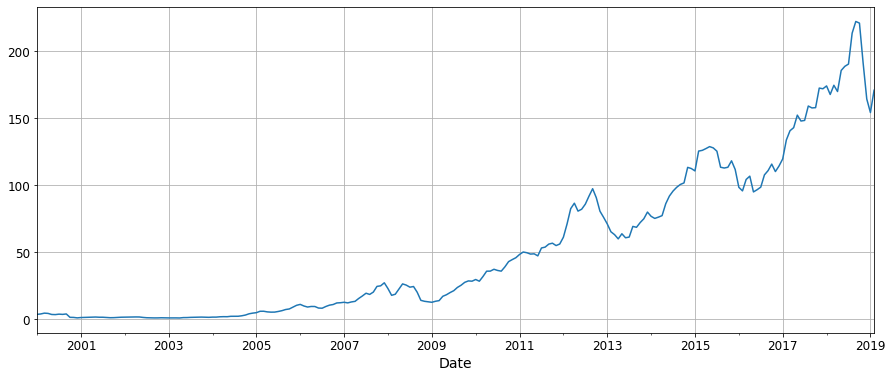

In [27]:
monthly_mean.plot(figsize=(15, 6))
plt.grid()
plt.show()

<Figure size 1296x864 with 0 Axes>

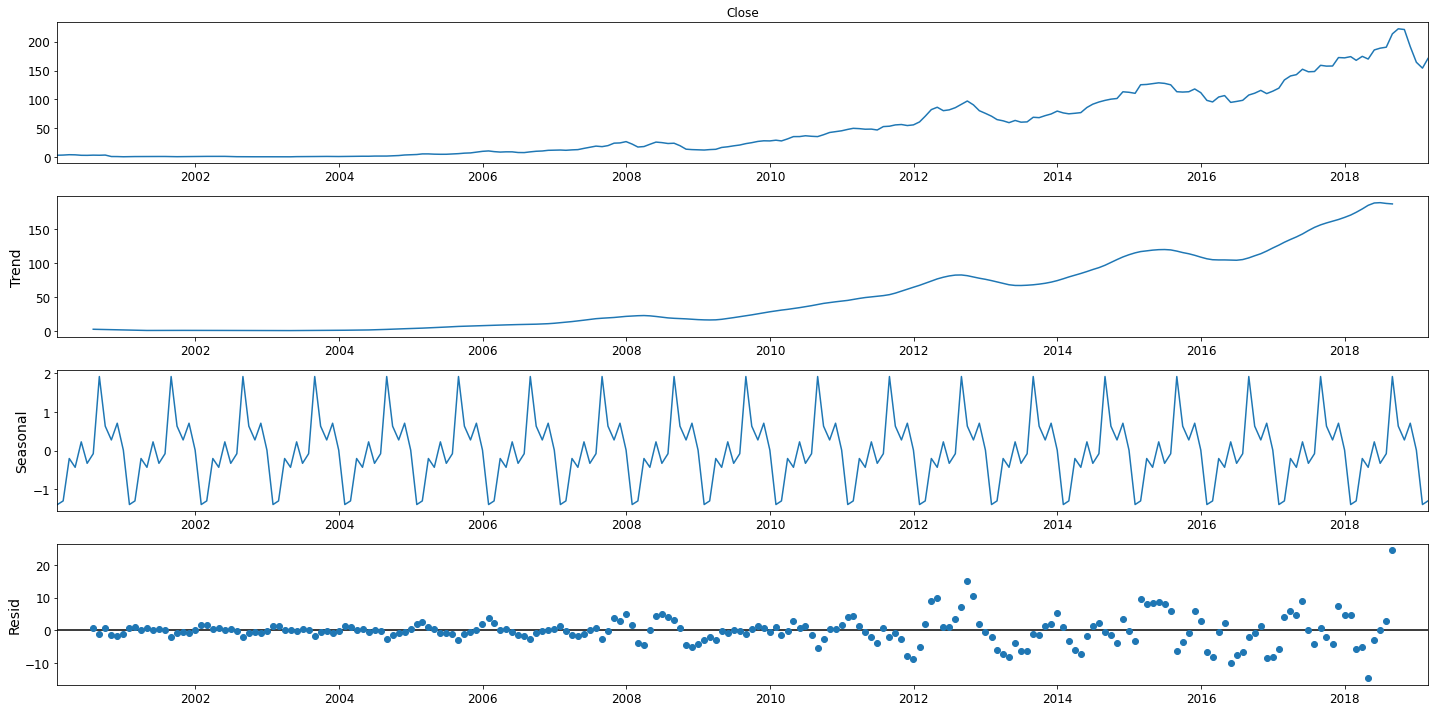

In [31]:
from pylab import rcParams
import statsmodels.api as sm

plt.figure(figsize=(18,12))
decomposition = sm.tsa.seasonal_decompose(monthly_mean, model='additive')
fig = decomposition.plot()
plt.show()

In [33]:
# Parameter Selection for the ARIMA Time Series Model. 
# ARIMA models are denoted with the notation ARIMA(p, d, q). 
# These three parameters account for seasonality, trend, and noise in data
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
l_param = []
l_param_seasonal=[]
l_results_aic=[]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            
            l_param.append(param)
            l_param_seasonal.append(param_seasonal)
            l_results_aic.append(results.aic)
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2643.5019979710623
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2309.334474785196
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1951.0204253540187
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1856.0314687281093
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1890.7953591460855
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1802.9557150994824
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1863.8878931058043
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1819.3731566965432
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2329.0358209780006
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2023.396311266782
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1696.2018573427472
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1614.327746361801
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1665.5653115243285
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1570.401879264185
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1628.240946920039
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1617.4495655101755
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1398.2204803534119
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1334.92167095894

In [35]:
minimum=l_results_aic[0]
for i in l_results_aic[1:]:
    if i < minimum: 
        minimum = i
i=l_results_aic.index(minimum)

In [36]:
mod = sm.tsa.statespace.SARIMAX(monthly_mean,
                                order=l_param[i],
                                seasonal_order=l_param_seasonal[i],
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3166      0.042      7.485      0.000       0.234       0.399
ar.S.L12      -0.3339      0.057     -5.863      0.000      -0.446      -0.222
ma.S.L12      -0.7985      0.059    -13.560      0.000      -0.914      -0.683
sigma2        25.9474      1.292     20.077      0.000      23.414      28.480


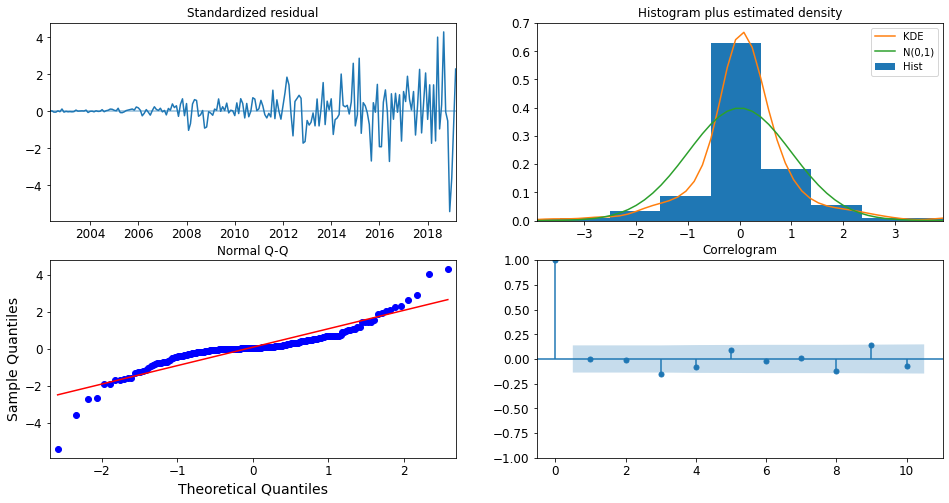

In [37]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

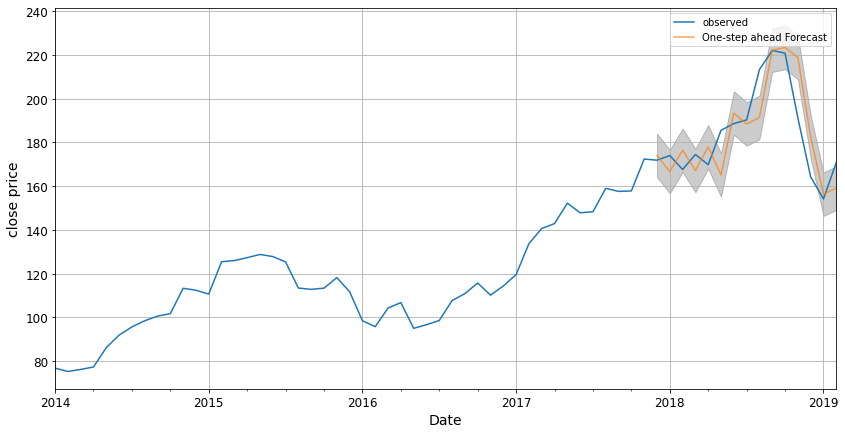

In [40]:
# To help us understand the accuracy of our forecasts, 
# we compare predicted Close to real close price of the time series, 
# and we set forecasts to start at 2017-12-31 to the end of the data.
pred = results.get_prediction(start=pd.to_datetime('2017-12-31'), dynamic=False)
pred_ci = pred.conf_int()

ax = monthly_mean['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('close price')
plt.legend()
plt.grid()
plt.show()

In [41]:
y_forecasted = pred.predicted_mean
y_truth = monthly_mean['2017-12-31':]

# Compute the mean square error
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 12.72


In [42]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 12.72


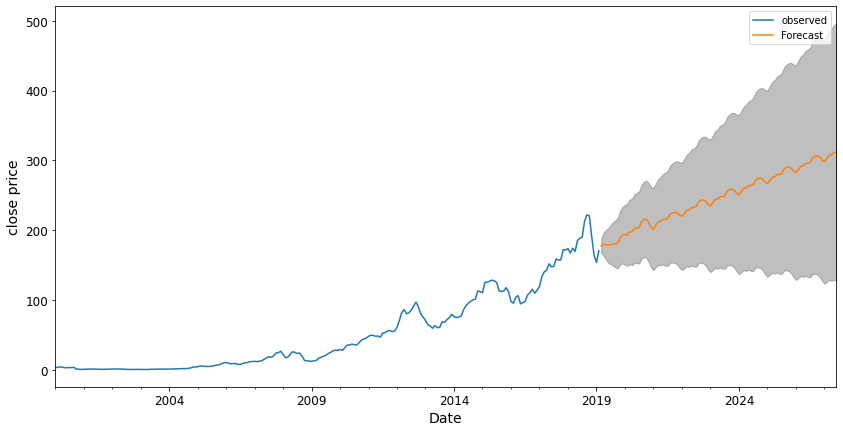

In [43]:
# Producing and visualizing forecasts
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()

ax = monthly_mean.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('close price')

plt.legend()
plt.show()

In [44]:
pred_ci

,lower Close,upper Close
2019-03-31,167.772605,187.741274
2019-04-30,163.556461,196.570693
2019-05-31,158.262452,200.465902
2019-06-30,153.777153,203.499613
2019-07-31,151.529569,207.774700
...,...,...
2027-02-28,126.325410,479.302596
2027-03-31,129.168952,485.886188
2027-04-30,127.811929,488.368340
2027-05-31,129.318210,493.673346


Our model clearly captured close price seasonality. As we forecast further out into the future, it is natural for us to become less confident in our values. This is reflected by the confidence intervals generated by our model, which grow larger as we move further out into the future.